## Quickstart

In [1]:
import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read

import topo_metrics as tm
import topo_metrics.analysis as tm_plt

%config InlineBackend.figure_format = 'svg'

### loading structures

The simplest way to get started is *via* `ASE`. Load any structure file that 
`ASE` can read, then pass the resulting `Atoms` object directly to 
`topo-metrics`.

Here we use two SiO$_2$ crystal structures: sodalite (a zeolite) and 
$\alpha$-quartz. To construct the graph, we apply a radial cut-off of $r=1.7~$Å 
between silicon and oxygen atoms. With `remove_types={"O"}`, the graph is 
reduced to silicon nodes connected *via* oxygen bridges: oxygen atoms define the 
connectivity, but the oxygen vertices themselves are removed.

In [2]:
sod = read("data/SOD.cif")
qtz = read("data/alpha-quartz.cif")

assert isinstance(sod, ase.Atoms)
assert isinstance(qtz, ase.Atoms)

graph_sod = tm.Topology.from_ase(ase_atoms=sod, cutoff=1.7, remove_types={"O"})
graph_qtz = tm.Topology.from_ase(ase_atoms=qtz, cutoff=1.7, remove_types={"O"})

print(
    "`graph_sod`: ", graph_sod,
    "\n`graph_qtz`: ", graph_qtz,
)

`graph_sod`:  Topology(nodes=12, edges=24, has_lattice=True) 
`graph_qtz`:  Topology(nodes=3, edges=6, has_lattice=True)


### topological genome

We can confirm that graph construction was successful by checking the
topological genome (as determined by
[CrystalNets.jl](https://coudertlab.github.io/CrystalNets.jl/dev/)).

In [3]:
graph_sod.get_topological_genome(), graph_qtz.get_topological_genome()

('sod, SOD', 'qtz')

### rings analysis

The per-node rings analysis is accessed by `Topology.get_clusters()`. Both nets
are uninodal, indicated by the single VertexSymbol and CARVS entries.

In [4]:
results_sod = graph_sod.get_clusters()
results_sod

RingsResults(
    depth=12,
    strong_rings=False,
    ring_size_count=RingSizeCounts(n_rings=46, min=4, max=12),
    VertexSymbol=[4.4.6.6.6.6],
    CARVS={4(2).6(4).12(32)}
)

In [5]:
results_qtz = graph_qtz.get_clusters()
results_qtz

RingsResults(
    depth=12,
    strong_rings=False,
    ring_size_count=RingSizeCounts(n_rings=18, min=6, max=8),
    VertexSymbol=[6.6.6(2).6(2).8(7).8(7)],
    CARVS={6(6).8(40)}
)

### ring size distribution

Global ring-size counts are stored in `RingsResults.ring_size_count`, which has
two attributes: `sizes` and `counts`. For quick inspection, a built-in
distribution plotter is provided.


In [6]:
rcounts = results_sod.ring_size_count
rcounts

RingSizeCounts(n_rings=46, min=4, max=12)

In [7]:
np.vstack([rcounts.sizes, rcounts.counts]).T[:16]

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  6],
       [ 5,  0],
       [ 6,  8],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12, 32],
       [13,  0],
       [14,  0],
       [15,  0],
       [16,  0]])

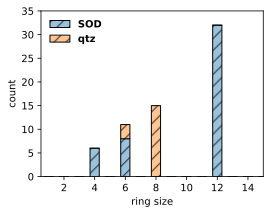

In [8]:
fig, ax = tm_plt.plot_ring_size_distributions(
    results=[results_sod, results_qtz], 
    labels=[r"$\bf SOD$", r"$\bf qtz$"]
)
ax.set_ylim(top=35)
plt.show()